Loading model from: C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\Filipino_Food_ResNet50_Final.h5


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Unknown class label in filename: Arroz Caldo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Unknown class label in filename: halo.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Unknown class label in filename: OIP.jpeg
Unknown class label in filename: pansit guisado.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Classification Report:
              precision    recall  f1-score   support

    afritada       1.00      1.00      1.00         1
  champorado       1.00      1.00      1.00         1
      lumpia       1.00      1.00      1.00         1
    pinakbet       1.00      1.00      1.00         1
    sinigang       1.00      1.00      1.00         1
      tinola       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00

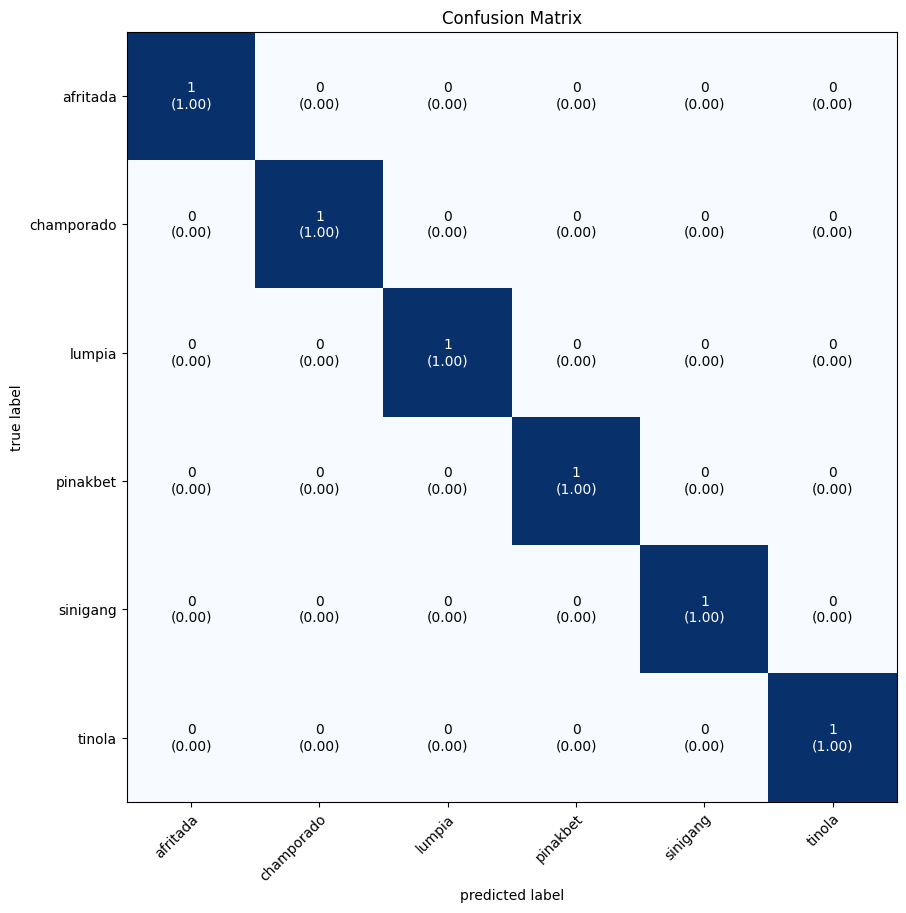


Test Accuracy: 100.00%


In [4]:
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
import matplotlib.pyplot as plt

# Define class names (update this list with your actual class labels)
CLASS_NAMES = [
    'afritada', 'arroz_caldo', 'bagnet', 'balut', 'bibingka', 
    'bicol_express', 'bistek_tagalog', 'buco_pie', 'bulalo', 
    'cassava_cake', 'champorado', 'chicharon', 'chicken_adobo',
    'chicken_bistek', 'chicken_inasal', 'crispy_pata', 
    'filipino_spaghetti', 'ginataang_gulay', 'halo-halo',
    'kaldereta', 'kare-kare', 'kilawin', 'kinilaw', 'laing', 
    'leche_flan', 'lechon', 'lechon_kawali', 'liempo', 
    'longganisa', 'lumpia', 'pancit_guisado', 'pancit_palabok',
    'pandesal', 'pinakbet', 'pork_adobo', 'pork_barbecue',
    'pork_sisig', 'sinigang', 'taho', 'tapa', 'tinola', 
    'tocino', 'turon', 'ube_ice_cream', 'ube_milkshake'
]

# Load the trained model
model_path = r"C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\Filipino_Food_ResNet50_Final.h5"
if not os.path.exists(model_path):
    print(f"Model file not found: {model_path}")
else:
    print(f"Loading model from: {model_path}")
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")

# Define the directory containing test images
image_dir = r"C:\Users\kimry\OneDrive\Desktop\DjangoTrainProject\core\ml_model\sample_image"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Store true and predicted labels for classification report
true_labels = []  # True labels (index values corresponding to CLASS_NAMES)
predicted_labels = []  # Predicted labels
filtered_class_names = []  # Classes found in the test dataset

# Process each test image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    
    # Extract the true label from the filename
    true_label_name = image_file.split(".")[0].lower()  # Extract the name without extension
    if true_label_name in CLASS_NAMES:
        true_label = CLASS_NAMES.index(true_label_name)
        true_labels.append(true_label)
        
        # Add unique class name to filtered_class_names if not already added
        if true_label_name not in filtered_class_names:
            filtered_class_names.append(true_label_name)
    else:
        print(f"Unknown class label in filename: {image_file}")
        continue

    # Open and preprocess the image
    try:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((224, 224))  # Resize to match model input size
        image_array = img_to_array(image)
        image_array = preprocess_input(np.expand_dims(image_array, axis=0))  # Apply same preprocessing as training

        # Make a prediction
        predictions = model.predict(image_array)
        predicted_class_index = np.argmax(predictions[0])  # Get index of the highest confidence
        predicted_labels.append(predicted_class_index)
    
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        predicted_labels.append(-1)  # Placeholder for error cases

# Filter class names to only include classes found in the test set
filtered_class_names = [CLASS_NAMES[i] for i in sorted(list(set(true_labels)))]

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=filtered_class_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), show_normed=True, class_names=filtered_class_names)
plt.title("Confusion Matrix")
plt.show()

# Calculate and Print Test Accuracy
accuracy = (np.diagonal(cm).sum() / cm.sum()) * 100
print(f"\nTest Accuracy: {accuracy:.2f}%")